In [2]:
import photutils, astropy
from photutils import datasets

import numpy
import matplotlib.pyplot as plt

from astropy import visualization, convolution, stats

In [3]:
data = datasets.make_100gaussians_image()
threshold = photutils.detect_threshold(data, snr=2.0)
sigma = 3.0 * stats.gaussian_fwhm_to_sigma
kernel = convolution.Gaussian2DKernel(sigma, x_size=3, y_size=3)
kernel.normalize()
segments = photutils.detect_sources(
    data, threshold, npixels=5, filter_kernel=kernel)
deblended = photutils.deblend_sources(data, segments, npixels=5, 
                               filter_kernel=kernel, nlevels=32,
                               contrast=0.001)

In [9]:
props = photutils.source_properties(data, deblended)
scale = 3.5
apertures = [photutils.EllipticalAperture(
    (i.xcentroid.value, i.ycentroid.value),
    i.semimajor_axis_sigma.value * scale,
    i.semiminor_axis_sigma.value * scale,
    theta=i.orientation.value) for i in props]

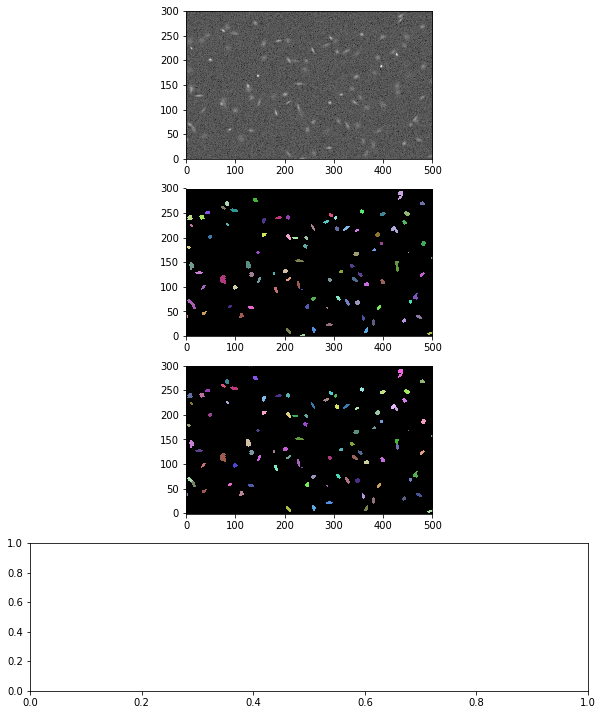

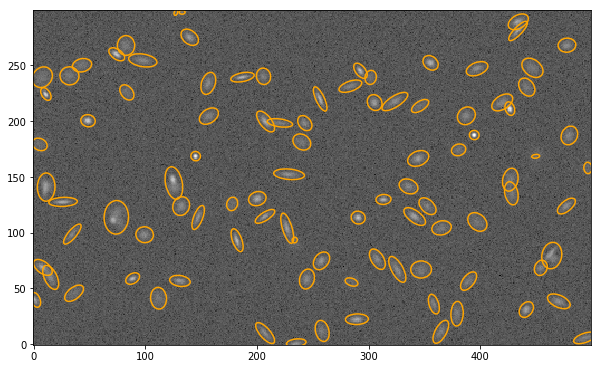

In [15]:
norm = visualization.mpl_normalize.ImageNormalize(
    stretch=visualization.SqrtStretch())
fig, ax = plt.subplots(4, 1, figsize=(10, 12.5))
ax[0].imshow(data, origin='lower', cmap='Greys_r', norm=norm)

ax[1].imshow(segments, origin='lower', cmap=segments.cmap(random_state=12345))
ax[2].imshow(deblended, origin='lower', cmap=segments.cmap(random_state=12345))

fig, (axyeet) = plt.subplots(1, 1, figsize=(10, 12.5))
axyeet.imshow(data, origin='lower', cmap='Greys_r', norm=norm)
for i in apertures: i.plot(color='orange', lw=1.5, ax=axyeet)